In [1]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [2]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Lab Notebook/Lab_data/Puram_collab_samples/BCA_IBP_20210914_130027.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]
expt_name = bca_file_path.split('/')[-1].split('.')[0]

In [3]:
# load file
df = pd.read_excel(bca_file_path,header=14)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,1.122,1.110,0.899,0.205,0.242,0.213,0.263,0.238,0.395,NaN,NaN,NaN
B,1.135,1.068,0.857,0.231,0.234,0.240,0.283,0.295,0.325,NaN,NaN,NaN
C,0.702,0.796,0.626,0.259,0.240,0.229,0.227,0.229,0.259,NaN,NaN,NaN
D,0.564,0.486,0.408,0.238,0.235,0.239,0.261,0.266,0.288,NaN,NaN,NaN
E,0.406,0.358,0.349,0.276,0.289,0.237,0.357,0.371,0.261,NaN,NaN,NaN
F,0.264,0.263,0.247,0.231,0.266,0.350,0.327,0.311,0.292,NaN,NaN,NaN
G,0.177,0.164,0.164,0.244,0.266,0.288,0.273,0.290,0.245,NaN,NaN,NaN
H,0.090,0.091,0.085,0.289,0.304,0.328,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':2000,
    'B':1500,
    'C':1000,
    'D':750,
    'E':500,
    'F':250,
    'G':125,
    'H':0
}

# Add standards to ignore if you have some outliers
# ignore = ['A','D']
ignore = []

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4],[0,5]],
    [[1,3],[1,4],[1,5]],
    [[2,3],[2,4],[2,5]],
    [[3,3],[3,4],[3,5]],
    [[4,3],[4,4],[4,5]],
    [[5,3],[5,4],[5,5]],
    [[6,3],[6,4],[6,5]],
    [[7,3],[7,4],[7,5]],
    [[0,6],[0,7],[0,8]],
    [[1,6],[1,7],[1,8]],
    [[2,6],[2,7],[2,8]],
    [[3,6],[3,7],[3,8]],
    [[4,6],[4,7],[4,8]],
    [[5,6],[5,7],[5,8]],
    [[6,6],[6,7],[6,8]]
]

# Sample names corresponding to the above positions
samples_names = [
    '4A',
    '5A',
    '6A',
    '1B',
    '2B',
    '3B',
    '4B',
    '5B',
    '6B',
    '1C',
    '2C',
    '3C',
    '4C',
    '5C',
    '6C'
]

Linear model:   A=0.0005181950575363139[protein]+0.12121524240709308
4A:
	Mean Absorbance: 0.21999999999999997
	Interpolated Concentration: 190.63238090800257  ug/mL
5A:
	Mean Absorbance: 0.23500000000000001
	Interpolated Concentration: 219.5790097533556  ug/mL
6A:
	Mean Absorbance: 0.24266666666666667
	Interpolated Concentration: 234.37395338542487  ug/mL
1B:
	Mean Absorbance: 0.2373333333333333
	Interpolated Concentration: 224.08181868485488  ug/mL
2B:
	Mean Absorbance: 0.2673333333333333
	Interpolated Concentration: 281.97507637556083  ug/mL
3B:
	Mean Absorbance: 0.2823333333333333
	Interpolated Concentration: 310.9217052209138  ug/mL
4B:
	Mean Absorbance: 0.266
	Interpolated Concentration: 279.4020427004184  ug/mL
5B:
	Mean Absorbance: 0.307
	Interpolated Concentration: 358.5228282110498  ug/mL
6B:
	Mean Absorbance: 0.2986666666666667
	Interpolated Concentration: 342.4413677414093  ug/mL
1C:
	Mean Absorbance: 0.301
	Interpolated Concentration: 346.9441766729086  ug/mL
2C:
	Mean Abs

Text(0, 0.5, 'Net Absorbance (562nm)')

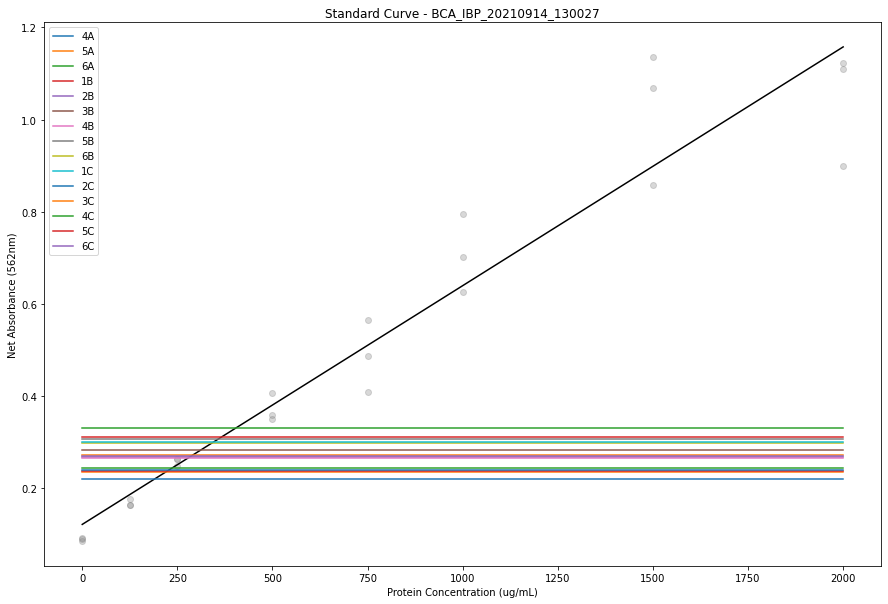

In [5]:
# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Scatterplot of points
std_curve = plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a linear regression
slope,intercept,r_val,pval,std_err = linregress(concentrations_x,absorbances_y)
plt.plot([0,2000],[intercept,intercept+slope*2000],c='black')
print('Linear model:   A=' + str(slope) + '[protein]' + '+' + str(intercept))

# Make interpolations for the samples
for samplenum in range(len(samples_positions)):
    sample_name = samples_names[samplenum]
    sample_abs = []
    for row,col in samples_positions[samplenum]:
        sample_abs.append(mat[row,col])
    # Get the mean absorbance and plot as a horizontal line
    plt.plot([0,2000],[np.mean(sample_abs)]*2,label=sample_name)
    print(sample_name + ':')
    print('\t' + 'Mean Absorbance: ' + str(np.mean(sample_abs)))
    print('\t' + 'Interpolated Concentration: ' + str((np.mean(sample_abs)-intercept)/slope) + '  ug/mL')

plt.legend()
plt.title('Standard Curve - ' + expt_name)
plt.xlabel('Protein Concentration (ug/mL)')
plt.ylabel('Net Absorbance (562nm)')

In [6]:
# Run this to save the figure
save_path = figure_base + '.png'
std_curve.savefig(save_path)

In [9]:
# Dilution
sample_conc = 2878
initial_vol = 992
target_conc = 2201

add = (sample_conc*(initial_vol) - target_conc*(initial_vol))/(target_conc)

print('Amount of water to add : ' + str(add))

Amount of water to add : 305.1267605633803


In [10]:
992+113.6

1105.6